In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## [ 실습 1 ]Convolution 사용하기

In [2]:
sess = tf.InteractiveSession()

image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]],dtype=np.float32)
print(image.shape)

(1, 3, 3, 1)


In [3]:
print('image.shape ',image.shape)
print('image.shape (입력 수, 입력세로길이, 입력가로길이, 입력채널수)\n')

weight = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])

print('weight.shape',weight.shape)
print('weight.shape (필터 세로길이, 필터 가로길이, 필터채널 수, 필터 수)\n')

conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
conv2d_img = conv2d.eval()

print('conv2d_img,shape',conv2d_img.shape)
print('conv2d_img,shape (출력 수, 출력 세로길이, 출력 가로길이, 출력 채널수)\n')

print('PADDING=VALID : 출력 크기 작아짐')


image.shape  (1, 3, 3, 1)
image.shape (입력 수, 입력세로길이, 입력가로길이, 입력채널수)

weight.shape (2, 2, 1, 1)
weight.shape (필터 세로길이, 필터 가로길이, 필터채널 수, 필터 수)

conv2d_img,shape (1, 2, 2, 1)
conv2d_img,shape (출력 수, 출력 세로길이, 출력 가로길이, 출력 채널수)

PADDING=VALID : 출력 크기 작아짐


## [ 실습 2 ] Padding 사용하기

In [4]:
print("image.shape", image.shape)
print("image.shape (입력수, 입력세로길이, 입력가로길이, 입력채널수)\n")

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
print("weiht.shape (필터세로길이, 필터가로길이, 필터채널수, 필터수)\n")

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print("conv2d_img.shape (출력수, 출력세로길이, 출력가로길이, 출력채널수)\n")

print("PADDING=SAME : 입출력 크기 유지")

image.shape (1, 3, 3, 1)
image.shape (입력수, 입력세로길이, 입력가로길이, 입력채널수)

weight.shape (2, 2, 1, 1)
weiht.shape (필터세로길이, 필터가로길이, 필터채널수, 필터수)

conv2d_img.shape (1, 3, 3, 1)
conv2d_img.shape (출력수, 출력세로길이, 출력가로길이, 출력채널수)

PADDING=SAME : 입출력 크기 유지


## [ 실습 3 ] 다중 Filter 사용하기

weight (2,2,1,3) --> (size, size, channel, number)

image.shape (1, 3, 3, 1)
image.shape (입력수, 입력세로길이, 입력가로길이, 입력채널수)

weight.shape (2, 2, 1, 3)
weiht.shape (필터세로길이, 필터가로길이, 필터채널수, 필터수)

conv2d_img.shape (1, 3, 3, 3)
conv2d_img.shape (출력수, 출력세로길이, 출력가로길이, 출력채널수)

(2, 2, 1, 3)
(1, 3, 3, 3)
conv2d_img.shape (출력수, 출력세로길이, 출력가로길이, 출력채널수)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


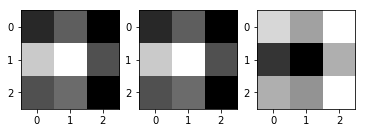

In [5]:
print("image.shape", image.shape)
print("image.shape (입력수, 입력세로길이, 입력가로길이, 입력채널수)\n")


weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
print("weiht.shape (필터세로길이, 필터가로길이, 필터채널수, 필터수)\n")



conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval(session=sess)
print("conv2d_img.shape", conv2d_img.shape)
print("conv2d_img.shape (출력수, 출력세로길이, 출력가로길이, 출력채널수)\n")


conv2d_img = np.swapaxes(conv2d_img, 0, 3)

weight2 = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight2.shape)
conv2d2 = tf.nn.conv2d(image, weight2, strides=[1, 1, 1, 1], padding='SAME')
conv2d2_img = conv2d2.eval(session=sess)

print(conv2d2_img.shape)
print("conv2d_img.shape (출력수, 출력세로길이, 출력가로길이, 출력채널수)\n")
## conv2d_img 그림으로 그려보기 
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## [ 실습 4 ] Padding
## VALID : No Paddings(출력 크기 다운 샘플링)
* 아래의 입력 데이터 패딩없이 풀링하면?


![대체 텍스트](https://camo.githubusercontent.com/04831ba0a6fcb63640f3ea2c3b5d8479c08f8f49/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334303335352f61346264336330382d666336662d313165362d386139392d3165336262626538363733332e706e67)

In [6]:
image = np.array([[[[4],[2],[3]],
                  [[2],[4],[1]],
                  [[1],[6],[2]]]],dtype=np.float32)
pool= tf.nn.max_pool(image, ksize=[1,2,2,1],
                    strides=[1,1,1,1],padding='VALID')
print(image.shape)
print(pool.shape)
print(pool.eval(session=sess))

(1, 3, 3, 1)
(1, 2, 2, 1)
[[[[4.]
   [4.]]

  [[6.]
   [6.]]]]


## SAME: Zero Paddings (출력과 입력 크기 동일)
- 경우에 따라 Padding이 한쪽만 이루어지기도 한다.


![대체 텍스트](https://camo.githubusercontent.com/9867aae562c82293ec18d75eaee213e723b3cc88/68747470733a2f2f636c6f75642e67697468756275736572636f6e74656e742e636f6d2f6173736574732f3930313937352f32333334303333372f37316232373635322d666336662d313165362d393665662d3736303939383735356637372e706e67)

In [7]:
image = np.array([[[[4],[3]],[[2],[1]]]],dtype=np.float32)
pool = tf.nn.max_pool(image,ksize=[1,2,2,1],strides=[1,1,1,1],padding='SAME')

print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## [ 실습 5 ]  MNIST

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [9]:
mnist=input_data.read_data_sets('MNIST_DATA/',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

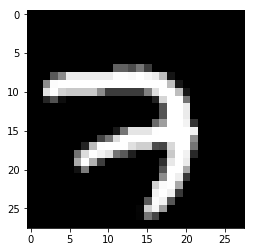

In [10]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap='gray')

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_4:0", shape=(1, 14, 14, 5), dtype=float32)
(1, 14, 14, 5)
(5, 14, 14, 1)
(14, 14, 1)
(14, 14, 1)
(14, 14, 1)
(14, 14, 1)
(14, 14, 1)


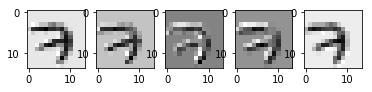

In [11]:
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))
conv2d = tf.nn.conv2d(img,W1,strides=[1,2,2,1], padding='SAME')
print(conv2d)

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval(session=sess)
print(conv2d_img.shape)


# feature map print

conv2d_img = np.swapaxes(conv2d_img,0,3)
print(conv2d_img.shape)

for i, one_img in enumerate(conv2d_img):
  print(one_img.shape)
  plt.subplot(1,5,i+1) , plt.imshow(one_img.reshape(14,14),cmap='gray')


In [12]:
print(conv2d.shape)

pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(pool)

(1, 14, 14, 5)
Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


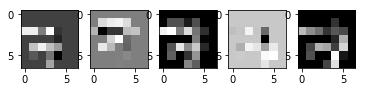

In [13]:
sess.run(tf.global_variables_initializer())
pool_img=pool.eval()

# feature map 출력
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
  plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(7,7),cmap='gray')

## [ 실습 ] 아래 그림의 CNN 모델을 직접 만들어 봅시다.

블록쌓기를 직접 하시면 됩니다.
## 주의할 점은 크기와 차원 수!


<img width="370" alt="스크린샷 2019-05-09 오전 9 59 28" src="https://user-images.githubusercontent.com/11758940/57420155-2fafc580-7241-11e9-9d35-07928e0bd10a.png">

In [14]:
import tensorflow as tf
import random

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777) # reproducibility
tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for 
# more information about the mnist dataset

# hyper parameters
learning_rate = 0.001
total_epochs= 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1,28,28,1]) # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
# Conv -> (?, 28, 28, 32)
# Pool -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],
                   strides=[1,2,2,1],padding='SAME')

W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

L2 = tf.nn.conv2d(L1,W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1],
                   strides=[1,2,2,1], padding='SAME')
L2_flat = tf.reshape(L2,[-1,7*7*64])

W3 = tf.get_variable("W3",shape=[7 * 7 * 64 , 10], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(L2_flat,W3)+b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

sess= tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning Started.!')

for epoch in range(total_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    feed_dict = {X:batch_xs, Y: batch_ys}
    c, _= sess.run([cost, optimizer], feed_dict=feed_dict)
    avg_cost += c / total_batch
    
  print('Epoch : {}, cost : {} '.format(epoch+1, avg_cost))
  
print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('accuracy : ', sess.run(accuracy, feed_dict={ X: mnist.test.images, Y : mnist.test.labels}))

r = random.randint(0, mnist.test.num_examples -1)
print('Label :',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Prediction: ',sess.run(tf.argmax(logits,1), feed_dict={X:mnist.test.images[r:r+1]}))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Learning Started.!
Epoch : 1, cost : 0.3325171658430588 
Epoch : 2, cost : 0.09001028037545351 
Epoch : 3, cost : 0.0687272061712363 
Epoch : 4, cost : 0.055105150084603934 
Epoch : 5, cost : 0.047061843547800734 
Epoch : 6, cost : 0.040651261214674855 
Epoch : 7, cost : 0.03485310652885924 
Epoch : 8, cost : 0.029883631536821734 
Epoch : 9, cost : 0.02653746588102712 
Epoch : 10, cost : 0.022204994889378382 
Epoch : 11, cost : 0.020940030232728044 
Epoch : 12, cost : 0.017144692520351685 
Epoch : 13, cost : 0.016797199750435532 
Epoch : 14, cost : 0.013711019416725971 
Epoch : 15, cost : 0.013444275898589018 
Learning Finished!
accuracy :  0.9881
Label : [6]
Prediction:  [6]


In [15]:
## [ 부록 ] Argmax 설명

import numpy as np
import tensorflow as tf

pred = np.array([[31, 23, 4, 24, 27, 34],
                [18, 3, 25, 0, 6, 35],
                [28, 14, 33,22,20,8],
                [13, 30, 32, 19, 7, 9],
                [16, 1, 26, 32, 2, 29],
                [17, 12, 5, 11, 10, 15]])

y = np.array([[31, 23,4, 24, 27, 34],
             [18, 3, 25, 0, 6, 35],
             [28, 14, 33, 22, 20, 8],
             [13, 30,32, 19, 7, 9],
             [16, 1, 26, 32, 2, 29],
             [17, 12, 5, 11, 10, 15]])

print(pred.shape)
print(y.shape)
sess= tf.Session()

pred_ = tf.argmax(pred,1)
y_ = tf.argmax(y,1)

print(sess.run(pred_))
print(sess.run(y_))

predict = tf.equal(pred_,y_)
print(sess.run(predict))

(6, 6)
(6, 6)
[5 5 2 2 3 0]
[5 5 2 2 3 0]
[ True  True  True  True  True  True]


# [실습] 아래 그림의 Deep CNN 모델을 직접 만들어 봅시다.
### 블록 쌓기를 직접 하시면됩니다.
### 주의할 점은 크기와 차원 수!

<img width="726" alt="스크린샷 2019-05-09 오전 10 04 52" src="https://user-images.githubusercontent.com/11758940/57420313-e9a73180-7241-11e9-832e-a50145cbb8cd.png">

// ? 는 입력의 수, none과 같은 의미로 사용하였음
// FC : Fully Connected

conv(?, 28, 28, 32) => ReLU(?, 28, 28, 32) => MaxPool(?, 14, 14, 32) => Dropout => conv( ?, 14, 14, 32) => ReLU(?, 14, 14, 64) => MaxPool(?, 7, 7, 64) => Dropout => conv( ?, 7, 7, 128) => ReLU(?, 7, 7, 128) => MaxPool(?, 4, 4, 128) => Dropout() => Reshape(?, 2048) => FC(?,625) => FC(?,10)



- 최종으로 나온 값이 바로 hypothesis, logit 에 해당합니다. 
- 이를 이용하여 지금까지 해오시던 분류기를 작성하시면 됩니다.

In [4]:
import tensorflow as tf
import random

from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

learning_rate = 0.001
total_epochs= 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None,784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))

L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1],
                   strides=[1, 2, 2,1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))

L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1],padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], 
                   strides=[1,2,2,1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

#print(L2.eval(session=sess))

W3= tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))

L3 = tf.nn.conv2d(L2,W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
print(L3_flat.shape)

W4 = tf.get_variable('W4',shape=[128 * 4 * 4, 625],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat,W4)+b4)
L4 = tf.nn.dropout(L4,keep_prob=keep_prob)

W5 = tf.get_variable('W5',shape=[625,10], initializer=tf.contrib.layers.xavier_initializer())
b5= tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4,W5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Training Started!')

for epoch in range(total_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7}
    c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
    avg_cost+= c / total_batch
    
  print('Epoch: {} , cost: {} '.format(epoch+1, avg_cost))
  
print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy : ',sess.run(accuracy, feed_dict={
    X:mnist.test.images, Y:mnist.test.labels,keep_prob:1 }))

r = random.randint(0, mnist.test.num_examples-1)
print('Label: ',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Preidction: ',sess.run(tf.argmax(logits,1),feed_dict={X:mnist.test.images[r:r+1],keep_prob:1}))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(?, 2048)
Training Started!
Epoch: 1 , cost: 0.3734414877065208 
Epoch: 2 , cost: 0.10203860268335457 
Epoch: 3 , cost: 0.07406804029237145 
Epoch: 4 , cost: 0.06071000872052862 
Epoch: 5 , cost: 0.05097249813801189 
Epoch: 6 , cost: 0.046097707901234644 
Epoch: 7 , cost: 0.04336440425831828 
Epoch: 8 , cost: 0.040016626248728836 
Epoch: 9 , cost: 0.03527157936827281 
Epoch: 10 , cost: 0.03266253229378811 
Epoch: 11 , cost: 0.031129746771660964 
Epoch: 12 , cost: 0.030255898063028752 
Epoch: 13 , cost: 0.02962379265079191 
Epoch: 14 , cost: 0.02718879756099671 
Epoch: 15 , cost: 0.027215801605542014 
Learning Finished!
Accuracy :  0.9932
Label:  [4]
Preidction:  [4]


In [6]:
import random
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MNIST_DATA/',one_hot=True)

r = random.randint(0, mnist.test.num_examples -1)
print(r)
print(mnist.test.labels.shape)

print(mnist.test.labels[r].shape)
print(mnist.test.labels[r:r+1].shape)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz
1657
(10000, 10)
(10,)
(1, 10)


In [12]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()
tf.set_random_seed(777)

mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

learning_rate = 0.001
total_epochs= 15
batch_size=100

keep_prob = tf.placeholder(tf.float32)



X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1,28,28,1])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
#print(W1.eval(session=sess))
L1 = tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L1 = tf.nn.dropout(L1,keep_prob=keep_prob)
#print(L1.eval(session=sess))
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2 = tf.nn.dropout(L2,keep_prob=keep_prob)

W3 = tf.Variable(tf.random_normal([3,3,64,128],stddev=0.01))

L3 = tf.nn.conv2d(L2,W3,strides=[1,1,1,1],padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L3 = tf.nn.dropout(L3,keep_prob=keep_prob)

L4 = tf.reshape(L3,[-1,2048])

W4 = tf.get_variable('W4',[2048,625],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L5 = tf.matmul(L4,W4)+b4

W5 = tf.get_variable('W5',[625,10],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L5,W5)+b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y))

optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(total_epochs):
  avg_cost=0
  total_batch = int(mnist.train.num_examples/batch_size)
  for i in range(total_batch):
    batch_xs,batch_ys = mnist.train.next_batch(batch_size)
    feed_dict = {X:batch_xs,Y:batch_ys,keep_prob:0.7}
    c,_ = sess.run([cost, optimizer],feed_dict=feed_dict)
    avg_cost += c / total_batch
    
  print('Epoch : {}, cost : {} '.format(epoch+1,avg_cost))
  
print('Learning Finished!')

correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,dtype=tf.float32))
print('Accuracy : {}'.format(sess.run(accuracy,feed_dict={
    X:mnist.test.images,Y:mnist.test.labels,keep_prob:1
})))

r = random.randint(0,mnist.test.num_examples-1)
print('label:',sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Prediction:',sess.run(tf.argmax(logits,1), feed_dict={
    X:mnist.test.images[r:r+1],keep_prob:1
}))
      
saver = tf.train.Saver()
saver.save(sess,'cnn_1')




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch : 1, cost : 0.377832468273965 
Epoch : 2, cost : 0.08596542904238133 
Epoch : 3, cost : 0.0664010379082439 
Epoch : 4, cost : 0.05719836078372532 
Epoch : 5, cost : 0.05222733749415391 
Epoch : 6, cost : 0.04846667629793624 
Epoch : 7, cost : 0.04619184933602807 
Epoch : 8, cost : 0.045309664982328704 
Epoch : 9, cost : 0.03929758610235611 
Epoch : 10, cost : 0.03959498525766483 
Epoch : 11, cost : 0.03680031298416327 
Epoch : 12, cost : 0.03836294916606589 
Epoch : 13, cost : 0.03429648623420773 
Epoch : 14, cost : 0.03226473579352549 
Epoch : 15, cost : 0.03174302097092469 
Learning Finished!
Accuracy : 0.9914000034332275
label: [6]
Prediction: [6]


'cnn_1'

In [13]:
! ls

checkpoint		   cnn_1.index	MNIST_data
cnn_1.data-00000-of-00001  cnn_1.meta	sample_data


In [19]:
import tensorflow as tf

sess=tf.Session()

saver = tf.train.import_meta_graph('cnn_1.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))

print(sess.run('W4:0'))
print(sess.run('W5:0'))


INFO:tensorflow:Restoring parameters from ./cnn_1
[[-0.15725768  0.02256031 -0.16956241 ...  0.17029001 -0.09441687
  -0.06085116]
 [ 0.04989119 -0.03779881  0.04074014 ... -0.00653167  0.07753915
   0.0036212 ]
 [-0.04994645 -0.01705536  0.00167465 ... -0.03734548  0.06056067
  -0.0212718 ]
 ...
 [ 0.02176306  0.13301222  0.00523832 ...  0.04030202 -0.00027603
   0.0144579 ]
 [ 0.0085523   0.02130443 -0.01386326 ... -0.01298272 -0.06413338
   0.02518249]
 [-0.04586482  0.00414573  0.03190744 ... -0.00975881  0.03079525
   0.01469767]]
[[ 0.10908561  0.03694173  0.01006249 ...  0.02568696 -0.06723368
  -0.09333585]
 [-0.05479736  0.04041259  0.05964954 ... -0.08683106  0.00062147
  -0.09102454]
 [ 0.09363422  0.03162787 -0.08351779 ... -0.08840571 -0.05049489
  -0.01404165]
 ...
 [-0.02351665 -0.06151914  0.04992854 ... -0.02436853  0.0296213
   0.0298121 ]
 [-0.03282595  0.06151667  0.09996278 ...  0.08050688  0.01282641
   0.03587833]
 [ 0.00765106 -0.06880003 -0.03640011 ... -0.0152